# Keras-Powered Robot Vision

    - Update Date: 4th March 2018

    - Edited By LEE, Stephen Haesung

    - Press "shift" + "Enter" to contnue.

## Using your USB Camera & Latop Camera for image recognition

    Take a picutre in your robot.

In [1]:
import os

In [2]:
os.system('fswebcam -r 1280x720 --no-banner /home/nvidia/Keras-Powered_Robot_Vision/test_image.jpg')

0


##### How to install a webcam:
    sudo apt-get install fswebcam   (Linux & Raspberry Pi)

    brew install imagesnap   (Mac)

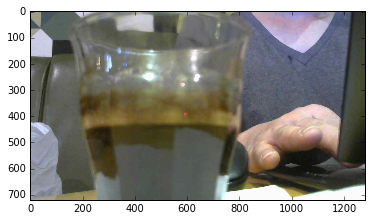

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
test_image = mpimg.imread(os.path.join("test_image.jpg"))
plt.imshow(test_image)
plt.axis("on")
plt.show()

In [4]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input, decode_predictions

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Converting the original image for Inception-V3 CNN

In [5]:
# convert /home/pi/Documents/images/cnn/test_image.png -resize 299x299! /home/pi/Documents/images/cnn/test_image.png
os.system('convert /home/nvidia/Keras-Powered_Robot_Vision/test_image.jpg -resize 299x299! /home/nvidia/Keras-Powered_Robot_Vision/test_image.jpg')

0

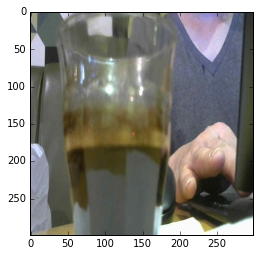

In [6]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
test_image = mpimg.imread(os.path.join("test_image.jpg"))
plt.imshow(test_image)
plt.axis("on")
plt.show()

### Load image
- Images can be loaded using load_img function

In [7]:
# img src = 'https://gfp-2a3tnpzj.stackpathdns.com/wp-content/uploads/2016/07/Dachshund-600x600.jpg'
img = load_img('test_image.jpg')

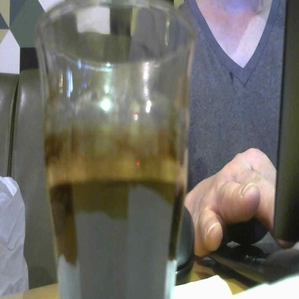

In [8]:
img

### Import model
- Currently, seven models are supported
    - Xception
    - VGG16
    - VGG19
    - ResNet50
    - InceptionV3
    - InceptionResNetV2
    - MobileNet

In [9]:
from keras.applications.resnet50 import ResNet50

In [10]:
model = ResNet50(weights='imagenet')

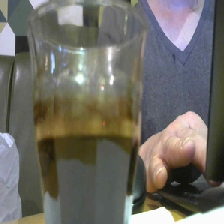

In [11]:
img = load_img('test_image.jpg', target_size = (224, 224))    # image size can be calibrated with target_size parameter
img

In [12]:
img = img_to_array(img)
print(img.shape)

(224, 224, 3)


In [13]:
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 224, 224, 3)


In [14]:
## prediction wo preprocessing
pred_class = model.predict(img)
# print(pred_class)

In [15]:
# print only top 10 predicted classes
n = 10
top_n = decode_predictions(pred_class, top=n)

In [16]:
for c in top_n[0]:
    print(c)

(u'n03950228', u'pitcher', 0.16822568)
(u'n04560804', u'water_jug', 0.15429397)
(u'n04522168', u'vase', 0.0603193)
(u'n02948072', u'candle', 0.059893627)
(u'n02883205', u'bow_tie', 0.05032856)
(u'n04131690', u'saltshaker', 0.047525976)
(u'n04557648', u'water_bottle', 0.038806222)
(u'n02815834', u'beaker', 0.03579346)
(u'n03062245', u'cocktail_shaker', 0.023085194)
(u'n04254120', u'soap_dispenser', 0.014170806)


In [17]:
img = preprocess_input(img)    # preprocess image with preprocess_input function
print(img.shape)

(1, 224, 224, 3)


In [18]:
## prediction with preprocessing
pred_class = model.predict(img)
# print(pred_class)

In [19]:
n = 10
top_n = decode_predictions(pred_class, top=n)

In [20]:
for c in top_n[0]:
    print(c)

(u'n02823750', u'beer_glass', 0.27269223)
(u'n07920052', u'espresso', 0.09046471)
(u'n03630383', u'lab_coat', 0.061747782)
(u'n03950228', u'pitcher', 0.04592403)
(u'n04560804', u'water_jug', 0.032825433)
(u'n02815834', u'beaker', 0.029381456)
(u'n02883205', u'bow_tie', 0.02746714)
(u'n03062245', u'cocktail_shaker', 0.013230838)
(u'n02823428', u'beer_bottle', 0.012552734)
(u'n04254120', u'soap_dispenser', 0.012386953)


In [ ]:
# END